In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
sns.set_theme()

In [3]:
grid = pd.read_csv('grid.csv')
grid

,Unnamed: 0,overall_acc,bal_acc,avg_odds_diff,disp_imp,stat_par_diff,eq_opp_diff,theil_ind,acc_parity,acc_odds,acc_opportunity,d_0,p_0,d_1,p_1
0,0,0.878939,0.780876,0.012145,0.363920,0.132861,0.011763,0.112258,0.746078,0.866794,0.867176,0.0,0.0,0.0,0.0
1,1,0.881371,0.858817,0.112267,0.275312,0.260323,0.096149,0.071438,0.621048,0.769104,0.785222,0.0,0.0,0.0,0.1
2,2,0.890216,0.828765,0.013530,0.449062,0.141545,0.064754,0.086461,0.748670,0.876685,0.825461,0.0,0.0,0.0,0.2
3,3,0.901382,0.852447,0.047652,0.320024,0.198340,0.035590,0.078300,0.703042,0.853730,0.865792,0.0,0.0,0.1,0.0
4,4,0.889110,0.839199,0.125340,0.247088,0.228352,0.167463,0.083571,0.660758,0.763770,0.721647,0.0,0.0,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,0.900387,0.854895,0.016782,0.350018,0.189463,0.031692,0.075204,0.710924,0.883605,0.868695,0.2,0.2,0.1,0.1
77,77,0.887673,0.837659,0.005630,0.384327,0.177578,0.054620,0.083617,0.710094,0.882043,0.833052,0.2,0.2,0.1,0.2
78,78,0.879713,0.808073,0.113688,0.246212,0.202510,0.155280,0.101314,0.677202,0.766025,0.724433,0.2,0.2,0.2,0.0
79,79,0.881592,0.822087,0.082100,0.297797,0.200646,0.098830,0.094883,0.680946,0.799492,0.782762,0.2,0.2,0.2,0.1


In [58]:
d_0s = sorted(grid.d_0.unique().tolist())
p_0s = sorted(grid.p_0.unique().tolist())
d_1s = sorted(grid.d_1.unique().tolist())
p_1s = sorted(grid.p_1.unique().tolist())
results = []

grid['demotion'] = ['d_0={0:.1f},d_1={1:.1f}'.format(d_0,d_1)
                 for d_0,d_1 in zip(grid['d_0'], grid['d_1'])]
grid['promotion'] = ['p_0={0:.1f},p_1={1:.1f}'.format(p_0,p_1)
                 for p_0,p_1 in zip(grid['p_0'], grid['p_1'])]
grid

,Unnamed: 0,overall_acc,bal_acc,avg_odds_diff,disp_imp,stat_par_diff,eq_opp_diff,theil_ind,acc_parity,acc_odds,acc_opportunity,d_0,p_0,d_1,p_1,demotion,promotion
0,0,0.878939,0.780876,0.012145,0.363920,0.132861,0.011763,0.112258,0.746078,0.866794,0.867176,0.0,0.0,0.0,0.0,"d_0=0.0,d_1=0.0","p_0=0.0,p_1=0.0"
1,1,0.881371,0.858817,0.112267,0.275312,0.260323,0.096149,0.071438,0.621048,0.769104,0.785222,0.0,0.0,0.0,0.1,"d_0=0.0,d_1=0.0","p_0=0.0,p_1=0.1"
2,2,0.890216,0.828765,0.013530,0.449062,0.141545,0.064754,0.086461,0.748670,0.876685,0.825461,0.0,0.0,0.0,0.2,"d_0=0.0,d_1=0.0","p_0=0.0,p_1=0.2"
3,3,0.901382,0.852447,0.047652,0.320024,0.198340,0.035590,0.078300,0.703042,0.853730,0.865792,0.0,0.0,0.1,0.0,"d_0=0.0,d_1=0.1","p_0=0.0,p_1=0.0"
4,4,0.889110,0.839199,0.125340,0.247088,0.228352,0.167463,0.083571,0.660758,0.763770,0.721647,0.0,0.0,0.1,0.1,"d_0=0.0,d_1=0.1","p_0=0.0,p_1=0.1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,0.900387,0.854895,0.016782,0.350018,0.189463,0.031692,0.075204,0.710924,0.883605,0.868695,0.2,0.2,0.1,0.1,"d_0=0.2,d_1=0.1","p_0=0.2,p_1=0.1"
77,77,0.887673,0.837659,0.005630,0.384327,0.177578,0.054620,0.083617,0.710094,0.882043,0.833052,0.2,0.2,0.1,0.2,"d_0=0.2,d_1=0.1","p_0=0.2,p_1=0.2"
78,78,0.879713,0.808073,0.113688,0.246212,0.202510,0.155280,0.101314,0.677202,0.766025,0.724433,0.2,0.2,0.2,0.0,"d_0=0.2,d_1=0.2","p_0=0.2,p_1=0.0"
79,79,0.881592,0.822087,0.082100,0.297797,0.200646,0.098830,0.094883,0.680946,0.799492,0.782762,0.2,0.2,0.2,0.1,"d_0=0.2,d_1=0.2","p_0=0.2,p_1=0.1"


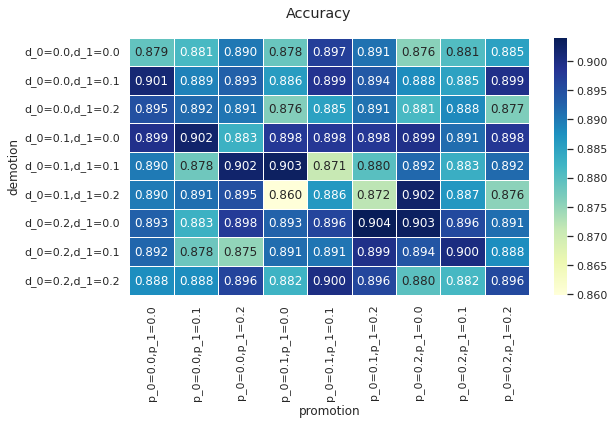

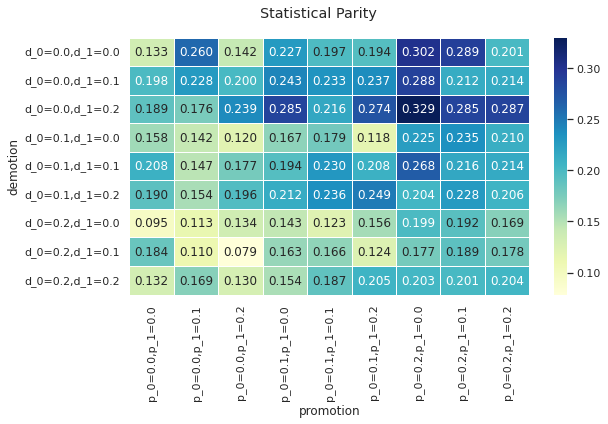

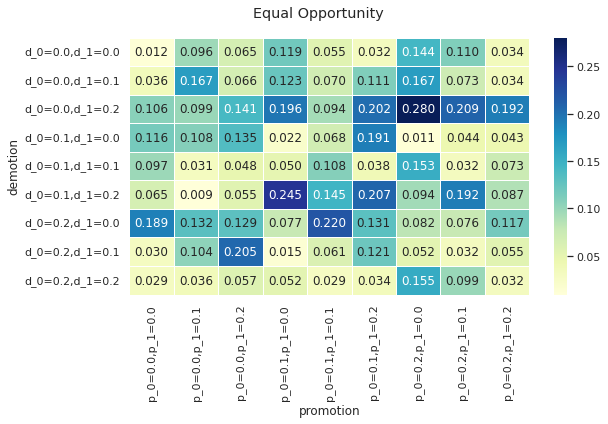

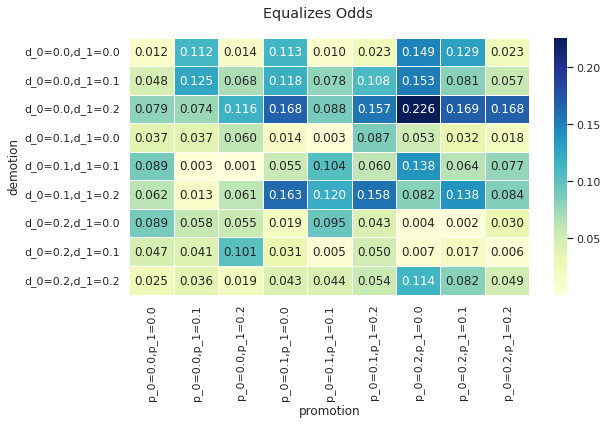

In [77]:
pivoted = grid.pivot(index='demotion', columns='promotion', values='overall_acc')
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Accuracy')
sns.heatmap(pivoted, annot=True, fmt=".3f", linewidths=.5, ax=ax, cmap='YlGnBu')
plt.tight_layout()
plt.savefig('acc.png')

pivoted = grid.pivot(index='demotion', columns='promotion', values='stat_par_diff')
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Statistical Parity')
sns.heatmap(pivoted, annot=True, fmt=".3f", linewidths=.5, ax=ax, cmap='YlGnBu')
plt.tight_layout()
plt.savefig('parity.png')

pivoted = grid.pivot(index='demotion', columns='promotion', values='eq_opp_diff')
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Equal Opportunity')
sns.heatmap(pivoted, annot=True, fmt=".3f", linewidths=.5, ax=ax, cmap='YlGnBu')
plt.tight_layout()
plt.savefig('equal_opportunity.png')

pivoted = grid.pivot(index='demotion', columns='promotion', values='avg_odds_diff')
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Equalizes Odds')
sns.heatmap(pivoted, annot=True, fmt=".3f", linewidths=.5, ax=ax, cmap='YlGnBu')
plt.tight_layout()
plt.savefig('equalized_odds.png')

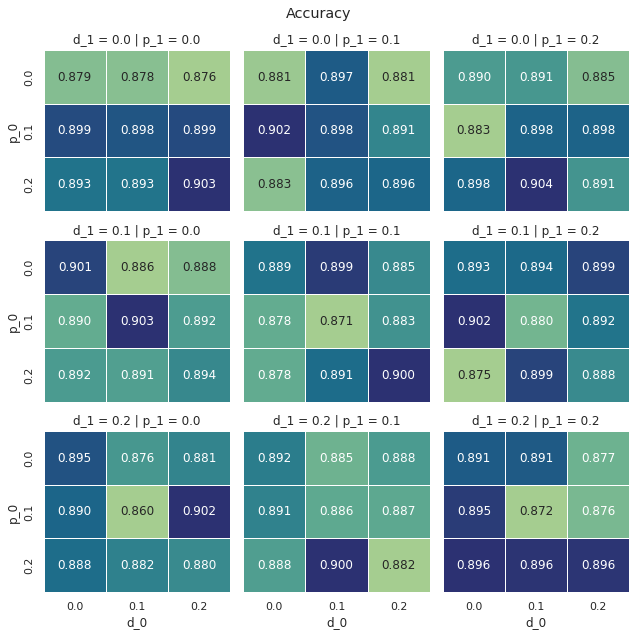

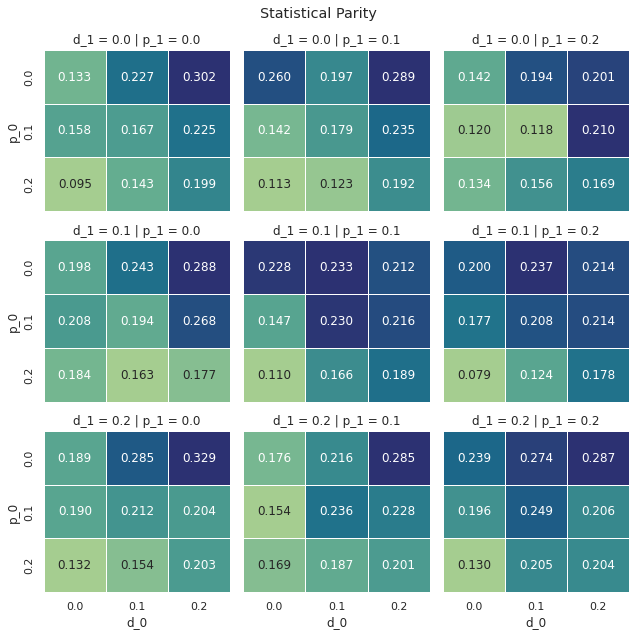

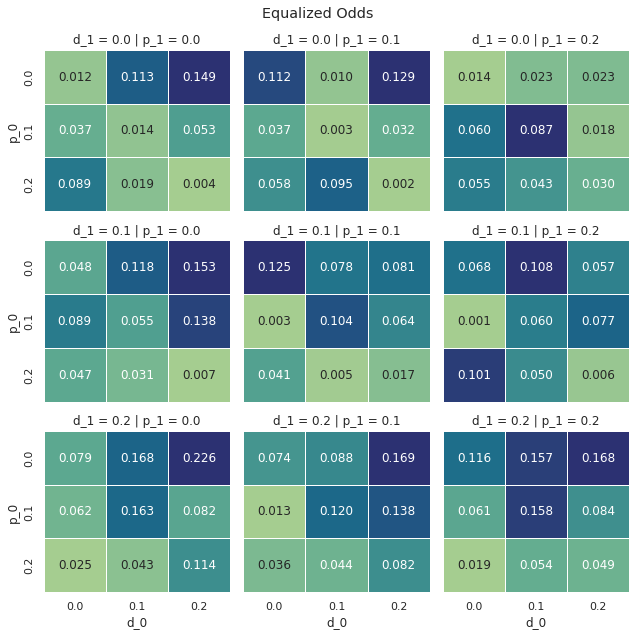

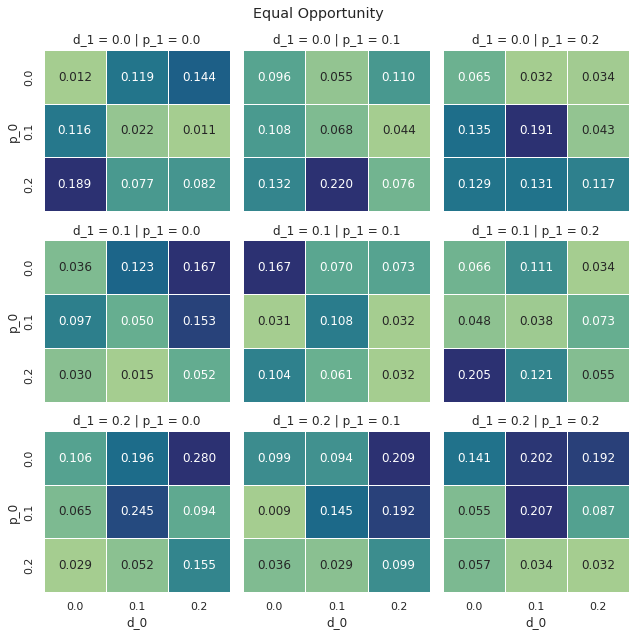

In [7]:
metrics_to_plot = ['overall_acc', 'stat_par_diff', 'avg_odds_diff', 'eq_opp_diff']

explain = {
        'overall_acc': 'Accuracy',
        'avg_odds_diff': 'Equalized Odds',
        'stat_par_diff': 'Statistical Parity',
        'eq_opp_diff': 'Equal Opportunity'
}

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[0], columns=args[1], values=args[2])
    sns.heatmap(d, **kwargs)


for metric in metrics_to_plot:
    fg = sns.FacetGrid(grid,row='d_1',col='p_1')
    fg.fig.suptitle(explain[metric])
    fg.map_dataframe(draw_heatmap, 'd_0', 'p_0', metric, cbar=False, annot=True, fmt=".3f", linewidths=.5, cmap="crest")
    fg.tight_layout()
    fg.savefig('{0}.png'.format(metric))

Unnamed: 0  overall_acc   bal_acc  avg_odds_diff  disp_imp  \
d_0 p_0 d_1 p_1                                                               
0.0 0.0 0.0 0.0           0     0.878939  0.780876       0.012145  0.363920   
            0.1           1     0.881371  0.858817       0.112267  0.275312   
            0.2           2     0.890216  0.828765       0.013530  0.449062   
        0.1 0.0           3     0.901382  0.852447       0.047652  0.320024   
            0.1           4     0.889110  0.839199       0.125340  0.247088   
...                     ...          ...       ...            ...       ...   
0.2 0.2 0.1 0.1          76     0.900387  0.854895       0.016782  0.350018   
            0.2          77     0.887673  0.837659       0.005630  0.384327   
        0.2 0.0          78     0.879713  0.808073       0.113688  0.246212   
            0.1          79     0.881592  0.822087       0.082100  0.297797   
            0.2          80     0.895744  0.850967       0.049090  0.319897   

                 stat_par_diff  eq_opp_diff  theil_ind  acc_parity  acc_odds  \
d_0 p_0 d_1 p_1                                                                
0.0 0.0 0.0 0.0       0.132861     0.011763   0.112258    0.746078  0.866794   
            0.1       0.260323     0.096149   0.071438    0.621048  0.769104   
            0.2       0.141545     0.064754   0.086461    0.748670  0.876685   
        0.1 0.0       0.198340     0.035590   0.078300    0.703042  0.853730   
            0.1       0.228352     0.167463   0.083571    0.660758  0.763770   
...                        ...          ...        ...         ...       ...   
0.2 0.2 0.1 0.1       0.189463     0.031692   0.075204    0.710924  0.883605   
            0.2       0.177578     0.054620   0.083617    0.710094  0.882043   
        0.2 0.0       0.202510     0.155280   0.101314    0.677202  0.766025   
            0.1       0.200646     0.098830   0.094883    0.680946  0.799492   
            0.2       0.203554     0.031582   0.077065    0.692190  0.846654   

                 acc_opportunity         demotion        promotion  
d_0 p_0 d_1 p_1                                                     
0.0 0.0 0.0 0.0         0.867176  d_0=0.0,d_1=0.0  p_0=0.0,p_1=0.0  
            0.1         0.785222  d_0=0.0,d_1=0.0  p_0=0.0,p_1=0.1  
            0.2         0.825461  d_0=0.0,d_1=0.0  p_0=0.0,p_1=0.2  
        0.1 0.0         0.865792  d_0=0.0,d_1=0.1  p_0=0.0,p_1=0.0  
            0.1         0.721647  d_0=0.0,d_1=0.1  p_0=0.0,p_1=0.1  
...                          ...              ...              ...  
0.2 0.2 0.1 0.1         0.868695  d_0=0.2,d_1=0.1  p_0=0.2,p_1=0.1  
            0.2         0.833052  d_0=0.2,d_1=0.1  p_0=0.2,p_1=0.2  
        0.2 0.0         0.724433  d_0=0.2,d_1=0.2  p_0=0.2,p_1=0.0  
            0.1         0.782762  d_0=0.2,d_1=0.2  p_0=0.2,p_1=0.1  
            0.2         0.864161  d_0=0.2,d_1=0.2  p_0=0.2,p_1=0.2  

[81 rows x 13 columns]

In [79]:

multi_pivot

d_1           0.0                           0.1                           0.2  \
p_1           0.0       0.1       0.2       0.0       0.1       0.2       0.0   
d_0 p_0                                                                         
0.0 0.0  0.132861  0.260323  0.141545  0.198340  0.228352  0.200489  0.188693   
    0.1  0.227486  0.197338  0.193682  0.243010  0.233335  0.237378  0.285373   
    0.2  0.301533  0.289282  0.200791  0.287589  0.212196  0.213506  0.329324   
0.1 0.0  0.158070  0.141617  0.119969  0.208398  0.146675  0.177164  0.189638   
    0.1  0.166731  0.178662  0.117707  0.194146  0.229566  0.208071  0.212011   
    0.2  0.224984  0.234785  0.209879  0.267728  0.215941  0.213787  0.203871   
0.2 0.0  0.094674  0.113183  0.134035  0.184084  0.110120  0.078580  0.132103   
    0.1  0.143371  0.122628  0.156378  0.162562  0.165646  0.124108  0.153773   
    0.2  0.198531  0.192150  0.168821  0.176550  0.189463  0.177578  0.202510   

d_1                          
p_1           0.1       0.2  
d_0 p_0                      
0.0 0.0  0.175536  0.238614  
    0.1  0.216172  0.273679  
    0.2  0.285268  0.286904  
0.1 0.0  0.154284  0.195783  
    0.1  0.236241  0.248862  
    0.2  0.227626  0.205559  
0.2 0.0  0.169149  0.129535  
    0.1  0.187375  0.205086  
    0.2  0.200646  0.203554

<AxesSubplot:xlabel='d_1-p_1', ylabel='d_0-p_0'>

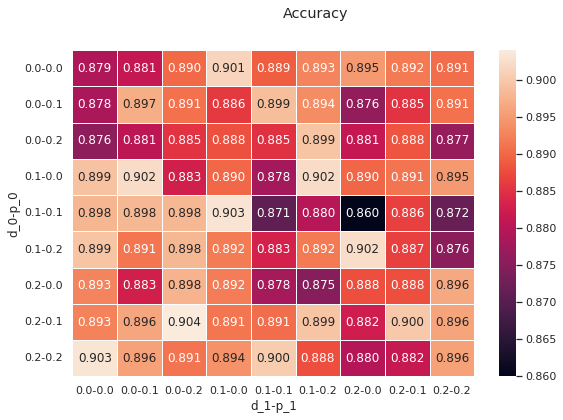

In [51]:
multi_pivot = pd.pivot_table(multi, index = ['d_0', 'p_0'], columns=['d_1', 'p_1'], values='overall_acc')
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Accuracy')
sns.heatmap(multi_pivot, annot=True, fmt=".3f", linewidths=.5, ax=ax)

<AxesSubplot:xlabel='d_1-p_1', ylabel='d_0-p_0'>

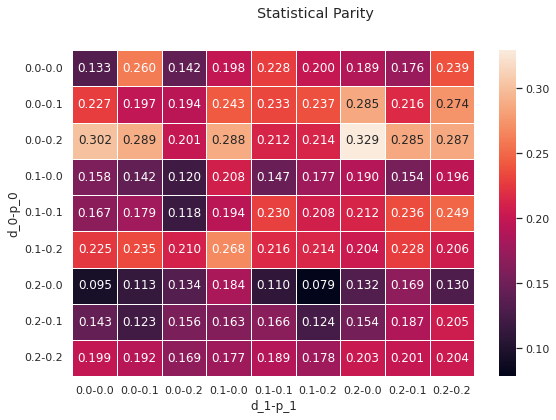

In [53]:
multi_pivot = pd.pivot_table(multi, index = ['d_0', 'p_0'], columns=['d_1', 'p_1'], values='stat_par_diff')
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Statistical Parity')
sns.heatmap(multi_pivot, annot=True, fmt=".3f", linewidths=.5, ax=ax)

In [80]:
pd.pivot_table(multi, index = ['d_0', 'p_0'], columns=['d_1', 'p_1'], values='stat_par_diff')

d_1           0.0                           0.1                           0.2  \
p_1           0.0       0.1       0.2       0.0       0.1       0.2       0.0   
d_0 p_0                                                                         
0.0 0.0  0.132861  0.260323  0.141545  0.198340  0.228352  0.200489  0.188693   
    0.1  0.227486  0.197338  0.193682  0.243010  0.233335  0.237378  0.285373   
    0.2  0.301533  0.289282  0.200791  0.287589  0.212196  0.213506  0.329324   
0.1 0.0  0.158070  0.141617  0.119969  0.208398  0.146675  0.177164  0.189638   
    0.1  0.166731  0.178662  0.117707  0.194146  0.229566  0.208071  0.212011   
    0.2  0.224984  0.234785  0.209879  0.267728  0.215941  0.213787  0.203871   
0.2 0.0  0.094674  0.113183  0.134035  0.184084  0.110120  0.078580  0.132103   
    0.1  0.143371  0.122628  0.156378  0.162562  0.165646  0.124108  0.153773   
    0.2  0.198531  0.192150  0.168821  0.176550  0.189463  0.177578  0.202510   

d_1                          
p_1           0.1       0.2  
d_0 p_0                      
0.0 0.0  0.175536  0.238614  
    0.1  0.216172  0.273679  
    0.2  0.285268  0.286904  
0.1 0.0  0.154284  0.195783  
    0.1  0.236241  0.248862  
    0.2  0.227626  0.205559  
0.2 0.0  0.169149  0.129535  
    0.1  0.187375  0.205086  
    0.2  0.200646  0.203554

In [81]:
pd.pivot_table(multi, index = ['d_0', 'p_0'], columns=['d_1', 'p_1'], values='eq_opp_diff')

d_1           0.0                           0.1                           0.2  \
p_1           0.0       0.1       0.2       0.0       0.1       0.2       0.0   
d_0 p_0                                                                         
0.0 0.0  0.011763  0.096149  0.064754  0.035590  0.167463  0.066064  0.106468   
    0.1  0.119061  0.055175  0.032411  0.122533  0.069506  0.110556  0.195957   
    0.2  0.143588  0.110033  0.034468  0.167491  0.072592  0.033916  0.280217   
0.1 0.0  0.115619  0.107948  0.135313  0.097271  0.031171  0.048137  0.064943   
    0.1  0.021756  0.067965  0.190798  0.049530  0.107679  0.038134  0.245314   
    0.2  0.011453  0.043967  0.042824  0.153107  0.031511  0.073017  0.094417   
0.2 0.0  0.189498  0.131738  0.129485  0.029792  0.103568  0.205101  0.029341   
    0.1  0.076951  0.219607  0.130685  0.014742  0.060939  0.120596  0.052124   
    0.2  0.081879  0.075929  0.116782  0.051610  0.031692  0.054620  0.155280   

d_1                          
p_1           0.1       0.2  
d_0 p_0                      
0.0 0.0  0.099098  0.141305  
    0.1  0.093525  0.202159  
    0.2  0.209130  0.192257  
0.1 0.0  0.009212  0.054759  
    0.1  0.145432  0.207283  
    0.2  0.191798  0.087321  
0.2 0.0  0.035756  0.057437  
    0.1  0.028679  0.034337  
    0.2  0.098830  0.031582

In [82]:
pd.pivot_table(multi, index = ['d_0', 'p_0'], columns=['d_1', 'p_1'], values='avg_odds_diff')

d_1           0.0                           0.1                           0.2  \
p_1           0.0       0.1       0.2       0.0       0.1       0.2       0.0   
d_0 p_0                                                                         
0.0 0.0  0.012145  0.112267  0.013530  0.047652  0.125340  0.068217  0.079437   
    0.1  0.113133  0.010397  0.022713  0.117929  0.078265  0.108083  0.167673   
    0.2  0.148899  0.129271  0.023336  0.152780  0.081405  0.057156  0.226183   
0.1 0.0  0.037180  0.036539  0.059721  0.089299  0.003052  0.000528  0.061635   
    0.1  0.014497  0.002945  0.086827  0.055383  0.103794  0.060401  0.162812   
    0.2  0.052769  0.032169  0.017703  0.138427  0.063912  0.077051  0.082474   
0.2 0.0  0.088639  0.057781  0.054536  0.046543  0.041446  0.101123  0.024614   
    0.1  0.018911  0.095024  0.042755  0.030929  0.004838  0.049879  0.042744   
    0.2  0.003737  0.002273  0.029621  0.007188  0.016782  0.005630  0.113688   

d_1                          
p_1           0.1       0.2  
d_0 p_0                      
0.0 0.0  0.073962  0.116374  
    0.1  0.088149  0.157057  
    0.2  0.169250  0.168358  
0.1 0.0  0.012795  0.061066  
    0.1  0.120037  0.157701  
    0.2  0.138456  0.083748  
0.2 0.0  0.035836  0.019088  
    0.1  0.043659  0.054368  
    0.2  0.082100  0.049090

In [84]:
pd.pivot_table(multi, index = ['d_0', 'p_0'], columns=['d_1', 'p_1'], values='overall_acc')

d_1           0.0                           0.1                           0.2  \
p_1           0.0       0.1       0.2       0.0       0.1       0.2       0.0   
d_0 p_0                                                                         
0.0 0.0  0.878939  0.881371  0.890216  0.901382  0.889110  0.892758  0.894748   
    0.1  0.878496  0.897070  0.890879  0.885793  0.898729  0.893532  0.876175   
    0.2  0.875622  0.880597  0.885130  0.887894  0.884909  0.899392  0.881371   
0.1 0.0  0.899281  0.902156  0.882698  0.889994  0.877944  0.902156  0.889884   
    0.1  0.897844  0.898065  0.898065  0.903151  0.870868  0.879823  0.859923   
    0.2  0.899392  0.891432  0.898065  0.891874  0.883140  0.891653  0.902377   
0.2 0.0  0.892758  0.882698  0.897623  0.891985  0.878165  0.874959  0.887783   
    0.1  0.892648  0.896186  0.904035  0.891432  0.890547  0.899392  0.882366   
    0.2  0.903261  0.895744  0.891211  0.894196  0.900387  0.887673  0.879713   

d_1                          
p_1           0.1       0.2  
d_0 p_0                      
0.0 0.0  0.891763  0.890547  
    0.1  0.885240  0.890768  
    0.2  0.888226  0.876617  
0.1 0.0  0.891211  0.894859  
    0.1  0.886457  0.871642  
    0.2  0.886567  0.875511  
0.2 0.0  0.887783  0.896407  
    0.1  0.900055  0.895965  
    0.2  0.881592  0.895744